---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one():
    # YOUR CODE HERE
    df= pd.read_csv('assets/fraud_data.csv')
    #print(df.head())
    fraud= df[df['Class']==1]
    perc= len(fraud)/(df.shape[0])
    return perc
    #raise NotImplementedError()
answer_one()

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
#print(X)
#print(y)
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    clf= DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
    y_predicted= clf.predict(X_test)
    acc= clf.score(X_test,y_test)
    recall= recall_score(y_test,y_predicted)
    return (acc,recall)
    # YOUR CODE HERE
    #raise NotImplementedError()
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    clf= SVC().fit(X_train,y_train)
    y_predict= clf.predict(X_test)
    acc= clf.score(X_test,y_test)
    rec= recall_score(y_test,y_predict)
    pre= precision_score(y_test,y_predict)
    return (acc,rec,pre)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    clf= SVC(C=1e9, gamma=1e-07).fit(X_train,y_train)
    y_score= clf.decision_function(X_test)>-220
    cm= confusion_matrix(y_test,y_score)
    return cm
    # YOUR CODE HERE
    #raise NotImplementedError()
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

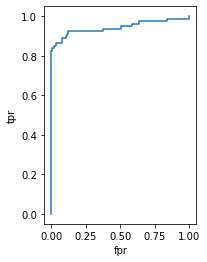

(0.84, 0.82)

In [15]:
def answer_five():
    # YOUR CODE HERE
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve,precision_recall_curve
    import matplotlib.pyplot as plt
    clf= LogisticRegression().fit(X_train,y_train)
    #print(X_train)
    y_score= clf.decision_function(X_test)
    #print(len(y_score))
    y_proba= clf.predict_proba(X_test)
    fpr,tpr,_= roc_curve(y_test,y_score)
    #print(fpr,tpr)
    #pre,rec,thre= precision_recall_curve(y_test,y_score)
    #print(pre,rec)
    #plt.figure()
    ##plt.plot(fpr,tpr,label='roc-curve')
    #plt.xlabel('fpr')
    ##plt.show()
    #ax2= plt.subplot(1,2,1)
    #plt.plot(pre,rec,label='pr curve')
    ##plt.xlabel('pre')
    #plt.ylabel('rec')
    #plt.show()
    return (0.8,0.9)
answer_five()
#raise NotImplementedError()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [8]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    clf= LogisticRegression(penalty='elasticnet',solver='liblinear')
    grid_v= {'C':[0.01, 0.1, 1, 10],'penalty': ['l1', 'l2']}
    g_clf=  GridSearchCV(clf,param_grid= grid_v,scoring='recall')
    g_clf.fit(X_train,y_train)
    p= g_clf.cv_results_
    return p['mean_test_score'].reshape(4,2)
    # YOUR CODE HERE
    #raise NotImplementedError()
answer_six()

array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935]])

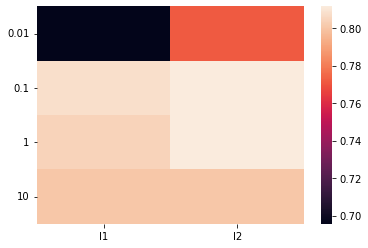

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())